<a href="https://colab.research.google.com/github/LYQ7220/Hand-written-Recognition/blob/master/Homework_5_Hand_written_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classification-Digits Dataset**


### Key Evaluation Terms



*  [Amazon ML Key Classification Metrics](https://docs.aws.amazon.com/machine-learning/latest/dg/binary-model-insights.html?icmpid=docs_machinelearning_console)
*  [sklearn classification metrics
](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)




*   **Precision**:  Measures the fraction of actual positives among those examples that are predicted as positive. The range is 0 to 1. A larger value indicates better predictive accuracy

*  ** Recall**:  Measures the fraction of actual positives that are predicted as positive. The range is 0 to 1. A larger value indicates better predictive accuracy

*   **F1-score**:  Weighted average of recall and precision


* **AUC**:  AUC measures the ability of the model to predict a higher score for positive examples as compared to negative examples

* **False Positive Rat**e:  The false positive rate (FPR) measures the false alarm rate or the fraction of actual negatives that are predicted as positive. The range is 0 to 1. A smaller value indicates better predictive accuracy





#Ingestion

In [0]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Modeling

##Model Pre-selection

###Split Data

In [0]:
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=1)

###Model Accuracy

In [0]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pandas as pd

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


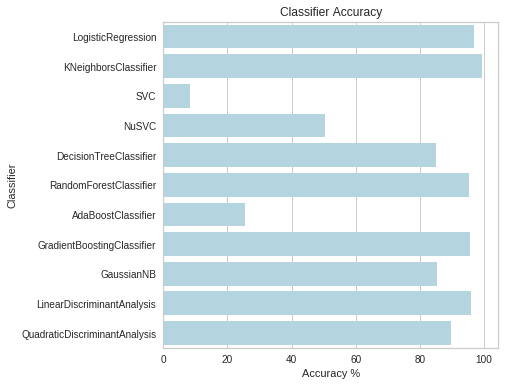

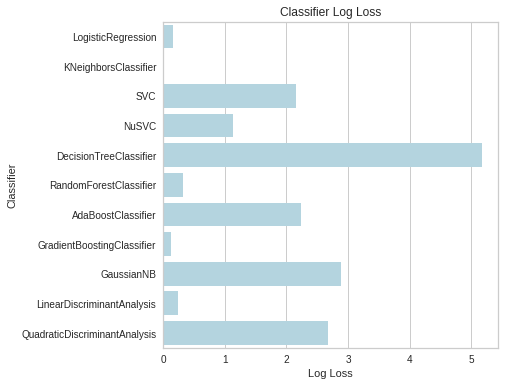

In [0]:
import seaborn as sns
sns.set_color_codes("muted")
plt.figure(figsize=(6,6))
sns.barplot(x='Accuracy', y='Classifier', data=log, color="lightblue")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
plt.figure(figsize=(6,6))
sns.barplot(x='Log Loss', y='Classifier', data=log, color="lightblue")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()


##Modeling -1 LogisticRegression

###Build Model

In [0]:
model = LogisticRegression()
classes=[0,1,2,3,4,5,6,7,8,9]

###Visualization

#### ROCAUC

http://www.scikit-yb.org/en/latest/api/classifier/rocauc.html


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


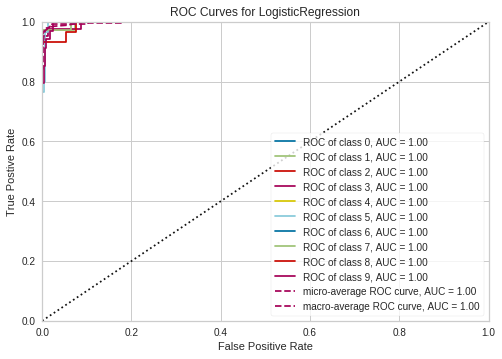

In [0]:
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression

# Instantiate the visualizer with the classification model
visualizer = ROCAUC(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

####Precision-Recall Curve

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

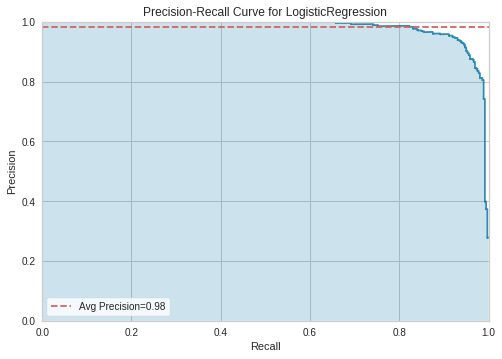

In [0]:
from yellowbrick.classifier import PrecisionRecallCurve

# The ConfusionMatrix visualizer taxes a model
visualizer = PrecisionRecallCurve(model, classes=classes)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
visualizer.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
visualizer.score(X_test, y_test)

# How did we do?
visualizer.poof()

####Yellowbrick Confusion Matrix



http://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html


In [0]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


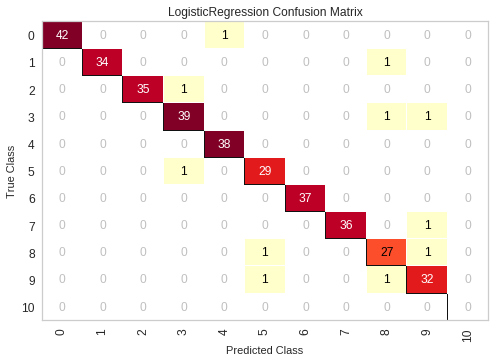

In [0]:

# The ConfusionMatrix visualizer taxes a model
visualizer = ConfusionMatrix(model, classes=classes)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
visualizer.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
visualizer.score(X_test, y_test)

# How did we do?
visualizer.poof()

In [0]:
visualizer.score(X_test, y_test)

0.9694444444444444

##Modeling -2 KNeighborsClassifier

###Build Model

In [0]:
model = KNeighborsClassifier(3)
classes=[0,1,2,3,4,5,6,7,8,9]

#### ROCAUC

http://www.scikit-yb.org/en/latest/api/classifier/rocauc.html


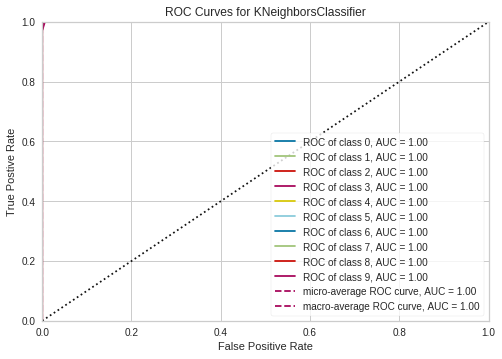

In [0]:
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression


# Instantiate the visualizer with the classification model
visualizer = ROCAUC(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

####Precision-Recall Curve

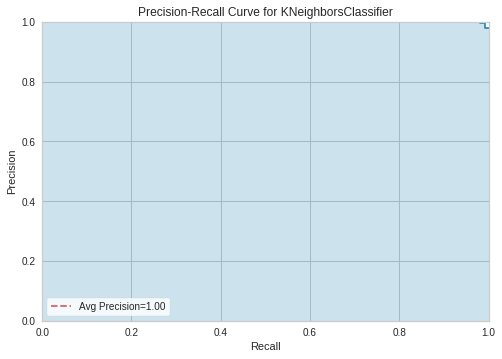

In [0]:
from yellowbrick.classifier import PrecisionRecallCurve

# The ConfusionMatrix visualizer taxes a model
visualizer = PrecisionRecallCurve(model, classes=classes)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
visualizer.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
visualizer.score(X_test, y_test)

# How did we do?
visualizer.poof()

####Yellowbrick Confusion Matrix



http://www.scikit-yb.org/en/latest/api/classifier/confusion_matrix.html


In [0]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix

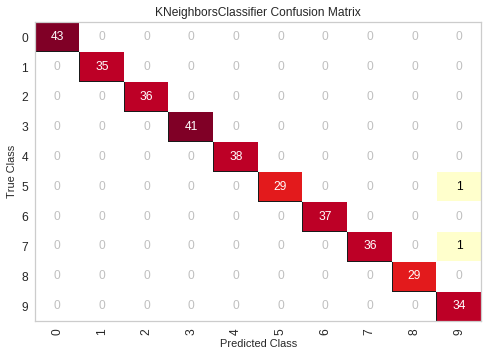

In [0]:

# The ConfusionMatrix visualizer taxes a model
visualizer = ConfusionMatrix(model, classes=classes)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
visualizer.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
visualizer.score(X_test, y_test)

# How did we do?
visualizer.poof()

In [0]:
visualizer.score(X_test, y_test)

0.9813527511160367

#Conclusion



*   KNeighborsClassifier outperforms the LogisticRegression Classifier as a whole
*   The hand-written number “3”, “8” and “9” are the most confusing ones for Logistic Regression 
*   The hand-written number “5” and “7” are the most confusing ones for KNeighborsClassifiers



